# Forest Cover Type Classification

The exercises on this sheet are graded by a maximum of 20 points. You will be asked to implement several functions.

Team work is not allowed. Everybody implements his/her own code. Discussing issues with others is fine, sharing code with others is not.

If you use any code fragments found on the Internet, make sure you reference them properly.

In this exercise, we will **predict the forest cover type** (the predominant kind of tree cover) from strictly cartographic variables. 

As in the regression assignment, $Y$ stands for a column vector of "target" values, that is the $i$-th row of $Y$ contains the desired output for the $i$-th data point. Contrary to regression, the elements of $Y$ in this classification task are integer values.

We will work with several popular classifiers provided by Scikit-learn package.

## Dataset: Forest cover data
This dataset contains 581012 tree observations from four areas of the Roosevelt National Forest in Colorado. All observations are cartographic variables (no remote sensing) from 30 meter x 30 meter sections of forest. 

This dataset includes information on tree type, shadow coverage, distance to nearby landmarks (roads etcetera), soil type, and local topography.

### Data Dictionary
- Elevation = Elevation in meters.
- Aspect = Aspect in degrees azimuth.
- Slope = Slope in degrees.
- Horizontal_Distance_To_Hydrology = Horizontal distance to nearest surface water features.
- Vertical_Distance_To_Hydrology = Vertical distance to nearest surface water features.
- Horizontal_Distance_To_Roadways = Horizontal distance to nearest roadway.
- Hillshade_9am = Hill shade index at 9am, summer solstice. Value out of 255.
- Hillshade_Noon = Hill shade index at noon, summer solstice. Value out of 255.
- Hillshade_3pm = Hill shade index at 3pm, summer solstice. Value out of 255.
- Horizontal_Distance_To_Fire_Points = sHorizontal distance to nearest wildfire ignition points.
- Wilderness_Area1 = Rawah Wilderness Area
- Wilderness_Area2 = Neota Wilderness Area
- Wilderness_Area3 = Comanche Peak Wilderness Area
- Wilderness_Area4 = Cache la Poudre Wilderness Area
- Soil_Type1 to Soil_Type40 (Total 40 Types)
- **Cover_Type** = Forest Cover Type designation. Integer value between 1 and 7, with the following key:

    1. Spruce/Fir
    2. Lodgepole Pine
    3. Ponderosa Pine
    4. Cottonwood/Willow
    5. Aspen
    6. Douglas-fir
    7. Krummholz



## Objective: 

We will **predict different cover types** in different wilderness areas of the Roosevelt National Forest of Northern Colorado with the best accuracy.

## Content:

1) Load Data (1 point)

2) Basic Statistics (1 point)

3) Exploratory Data Analysis (4 points)

4) Training Models

    0) Data Preparation (1 point)

    1) Logistic Regression (1 point)

    2) Decision Tree Classification (1 point)

    3) Random Forest (1 point)

    4) K Nearest Neighbor (1 point)

    5) Hyperparameter Tuning (2 point)

    6) Support Vector Machine (1 point)

5) Data Imbalance Problem

    1) Training with Under-Sampled Data (3 points)

    2) Training with Over-Sampled Data (3 points)

In [1]:
# import packages
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 8

%matplotlib inline 

## 1) Load data (1 point)

- Use ```pandas.read_csv()``` to load the data.

In [2]:
df_cover = pd.read_csv('Datasets/ForestCover.csv', header=0, na_filter=True)
df_cover.columns = df_cover.columns.str.upper()

- Visualize the first and the last 5 rows of the data, using ```.head()``` and ```.tail()```.

In [3]:
df_cover.head(n=5)

,ELEVATION,ASPECT,SLOPE,HORIZONTAL_DISTANCE_TO_HYDROLOGY,VERTICAL_DISTANCE_TO_HYDROLOGY,HORIZONTAL_DISTANCE_TO_ROADWAYS,HILLSHADE_9AM,HILLSHADE_NOON,HILLSHADE_3PM,HORIZONTAL_DISTANCE_TO_FIRE_POINTS,...,SOIL_TYPE32,SOIL_TYPE33,SOIL_TYPE34,SOIL_TYPE35,SOIL_TYPE36,SOIL_TYPE37,SOIL_TYPE38,SOIL_TYPE39,SOIL_TYPE40,COVER_TYPE
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
df_cover.tail(n=5)

,ELEVATION,ASPECT,SLOPE,HORIZONTAL_DISTANCE_TO_HYDROLOGY,VERTICAL_DISTANCE_TO_HYDROLOGY,HORIZONTAL_DISTANCE_TO_ROADWAYS,HILLSHADE_9AM,HILLSHADE_NOON,HILLSHADE_3PM,HORIZONTAL_DISTANCE_TO_FIRE_POINTS,...,SOIL_TYPE32,SOIL_TYPE33,SOIL_TYPE34,SOIL_TYPE35,SOIL_TYPE36,SOIL_TYPE37,SOIL_TYPE38,SOIL_TYPE39,SOIL_TYPE40,COVER_TYPE
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3
581011,2383,165,13,60,4,67,231,244,141,875,...,0,0,0,0,0,0,0,0,0,3


## 2) Basic statistics (1 point)
- Print overall info, using ```.info()```.

In [5]:
df_cover.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   ELEVATION                           581012 non-null  int64
 1   ASPECT                              581012 non-null  int64
 2   SLOPE                               581012 non-null  int64
 3   HORIZONTAL_DISTANCE_TO_HYDROLOGY    581012 non-null  int64
 4   VERTICAL_DISTANCE_TO_HYDROLOGY      581012 non-null  int64
 5   HORIZONTAL_DISTANCE_TO_ROADWAYS     581012 non-null  int64
 6   HILLSHADE_9AM                       581012 non-null  int64
 7   HILLSHADE_NOON                      581012 non-null  int64
 8   HILLSHADE_3PM                       581012 non-null  int64
 9   HORIZONTAL_DISTANCE_TO_FIRE_POINTS  581012 non-null  int64
 10  WILDERNESS_AREA1                    581012 non-null  int64
 11  WILDERNESS_AREA2                    581012 non-null 

- Print dataframe statistics using ```.describe()```.

In [6]:
df_cover.describe()

,ELEVATION,ASPECT,SLOPE,HORIZONTAL_DISTANCE_TO_HYDROLOGY,VERTICAL_DISTANCE_TO_HYDROLOGY,HORIZONTAL_DISTANCE_TO_ROADWAYS,HILLSHADE_9AM,HILLSHADE_NOON,HILLSHADE_3PM,HORIZONTAL_DISTANCE_TO_FIRE_POINTS,...,SOIL_TYPE32,SOIL_TYPE33,SOIL_TYPE34,SOIL_TYPE35,SOIL_TYPE36,SOIL_TYPE37,SOIL_TYPE38,SOIL_TYPE39,SOIL_TYPE40,COVER_TYPE
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


- Check if there are missing values

In [7]:
print(df_cover.isnull().sum(axis=0))

ELEVATION                             0
ASPECT                                0
SLOPE                                 0
HORIZONTAL_DISTANCE_TO_HYDROLOGY      0
VERTICAL_DISTANCE_TO_HYDROLOGY        0
HORIZONTAL_DISTANCE_TO_ROADWAYS       0
HILLSHADE_9AM                         0
HILLSHADE_NOON                        0
HILLSHADE_3PM                         0
HORIZONTAL_DISTANCE_TO_FIRE_POINTS    0
WILDERNESS_AREA1                      0
WILDERNESS_AREA2                      0
WILDERNESS_AREA3                      0
WILDERNESS_AREA4                      0
SOIL_TYPE1                            0
SOIL_TYPE2                            0
SOIL_TYPE3                            0
SOIL_TYPE4                            0
SOIL_TYPE5                            0
SOIL_TYPE6                            0
SOIL_TYPE7                            0
SOIL_TYPE8                            0
SOIL_TYPE9                            0
SOIL_TYPE10                           0
SOIL_TYPE11                           0


## 3) Exploratory Data Analysis (4 point)
- Print the number of samples per category

In [8]:
counts = df_cover["COVER_TYPE"].value_counts(sort=True)
print(counts)

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: COVER_TYPE, dtype: int64


- Visualise this distribution, using ```sns.countplot()```

<AxesSubplot: xlabel='COVER_TYPE', ylabel='count'>

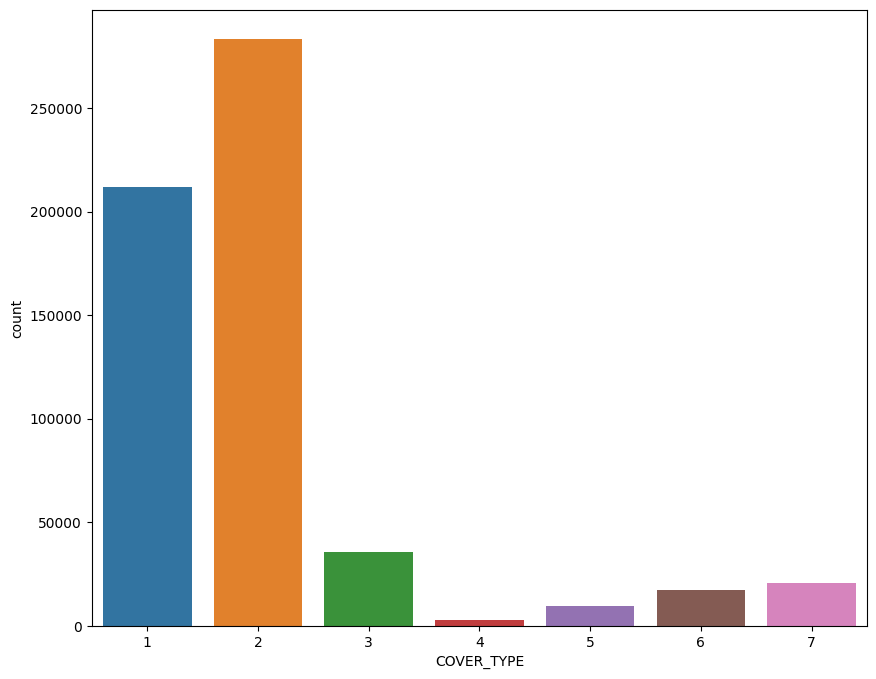

In [9]:
plt.figure()
sns.countplot(data=df_cover, x="COVER_TYPE")

### Feature Histograms 
- Visualize data distribution of the first four features via Histograms using ```sns.displot()```. (Show four figures. Use a loop to plot them)

<Figure size 1000x800 with 0 Axes>

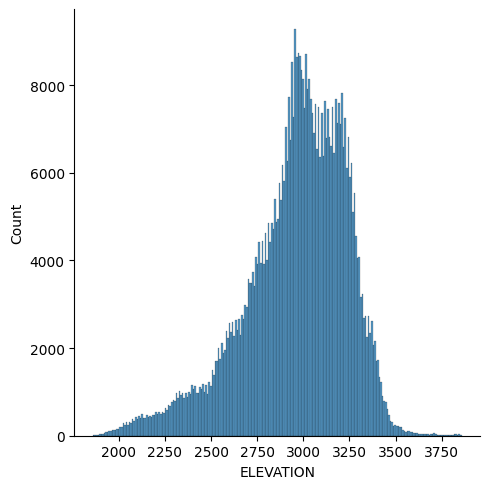

<Figure size 1000x800 with 0 Axes>

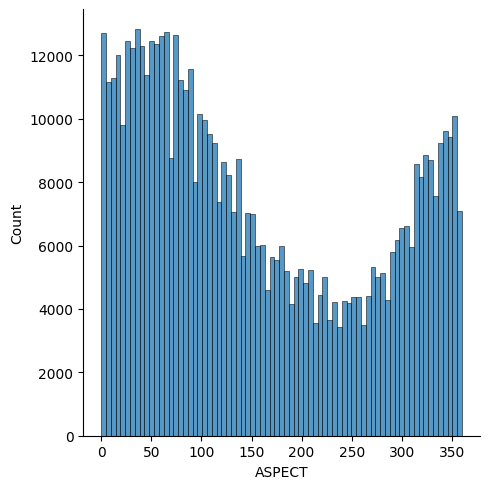

<Figure size 1000x800 with 0 Axes>

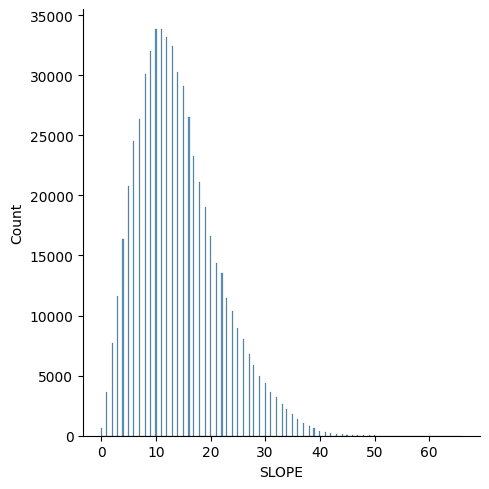

<Figure size 1000x800 with 0 Axes>

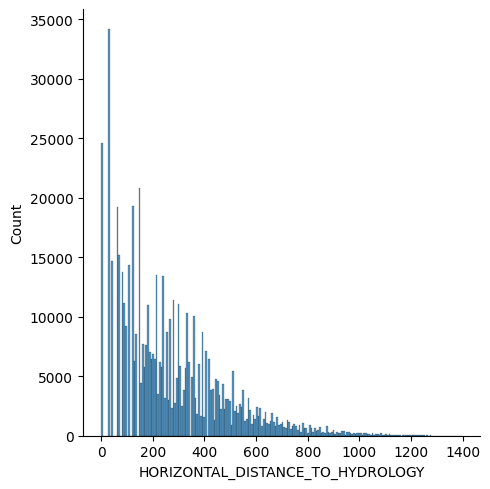

In [10]:
for i in range(4):
    plt.figure()
    sns.displot(df_cover[df_cover.columns[i]])

### Correlation between Variables
- Show correlation between variables, using ```sns.heatmap()```. (Since 55 columns are too many, don't show soil types and cover type）

<AxesSubplot: >

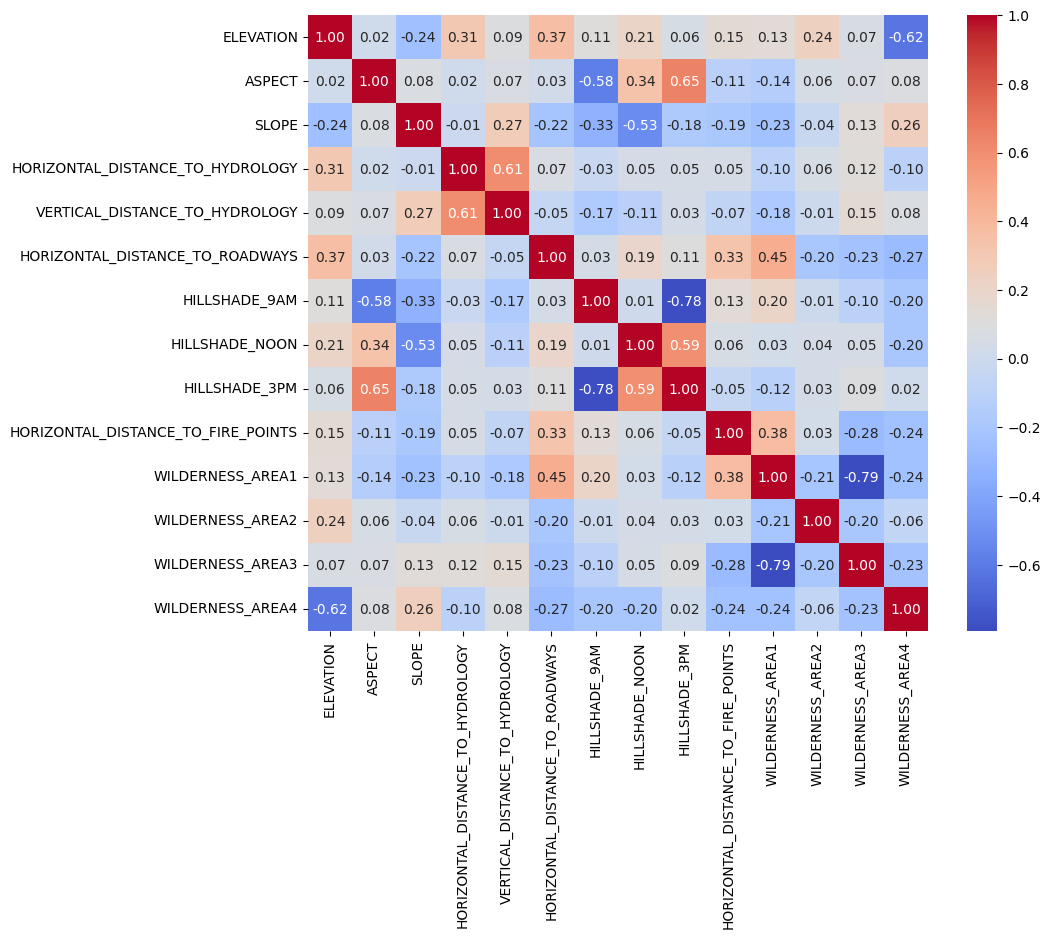

In [11]:
plt.figure()
sns.heatmap(df_cover.drop(columns=df_cover.columns[-41:]).corr(), cmap="coolwarm", annot=True, fmt="0.2f")

### Data Distribution w.r.t. Categories
- Show data distribution w.r.t. categories, using ```sns.boxplot()```. (x-axis: cover type, y-axis: feature variable, please show 10 figures for the first 10 variables. Use a loop to plot them)

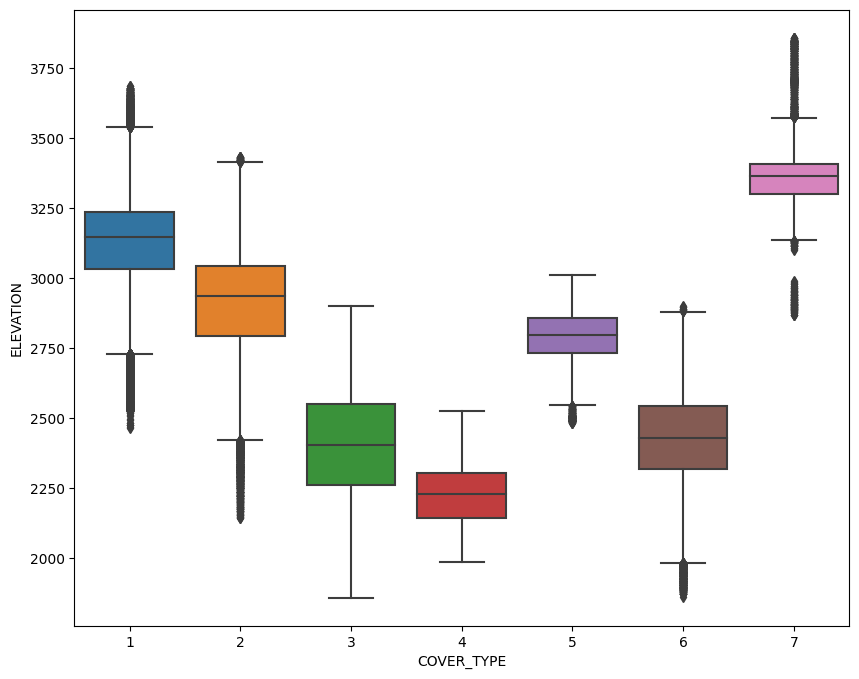

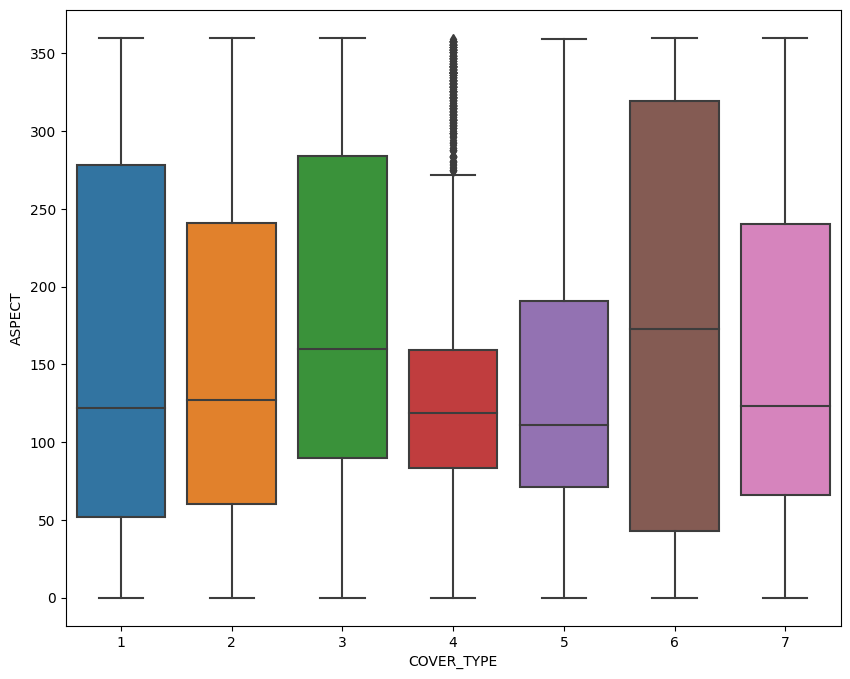

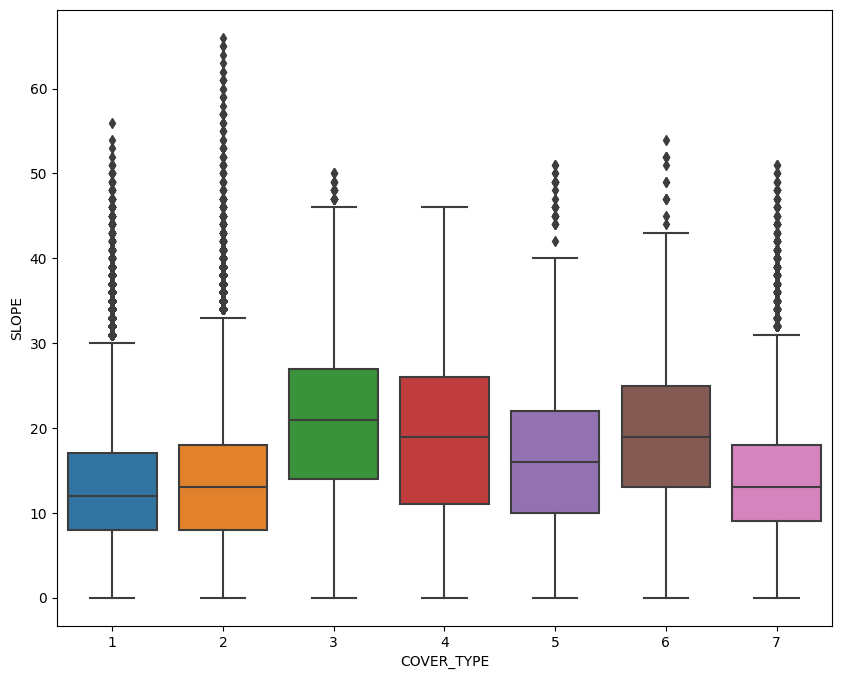

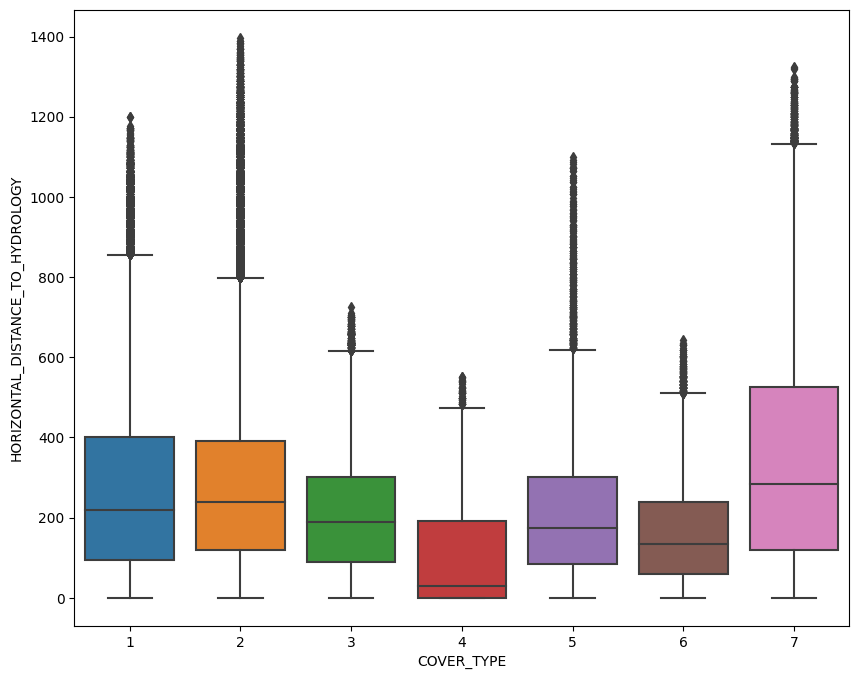

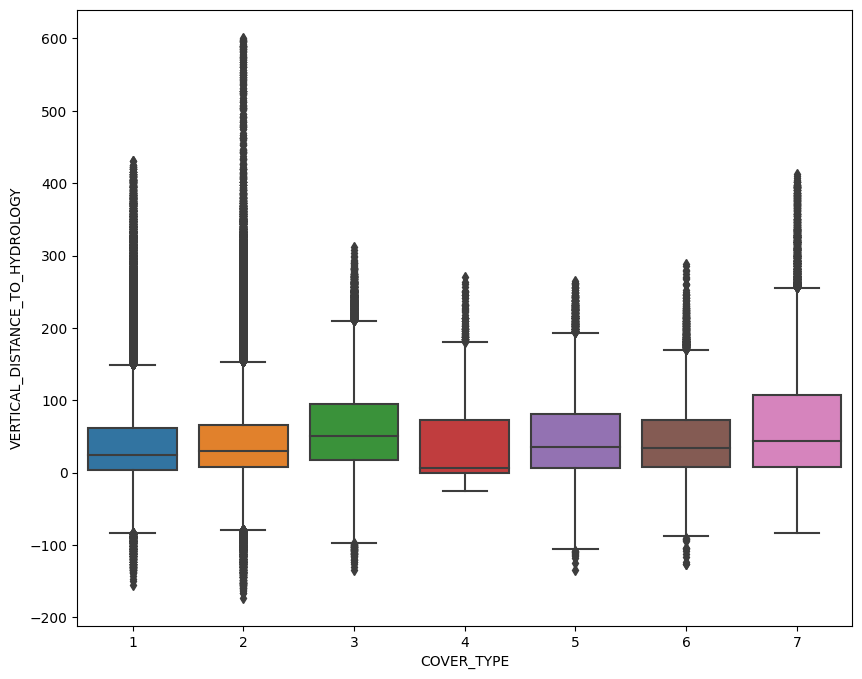

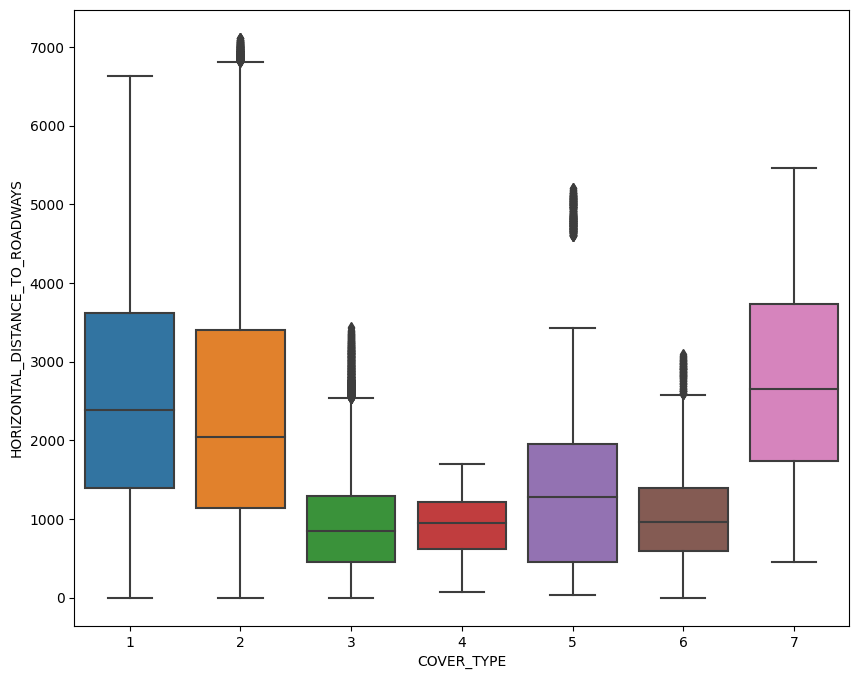

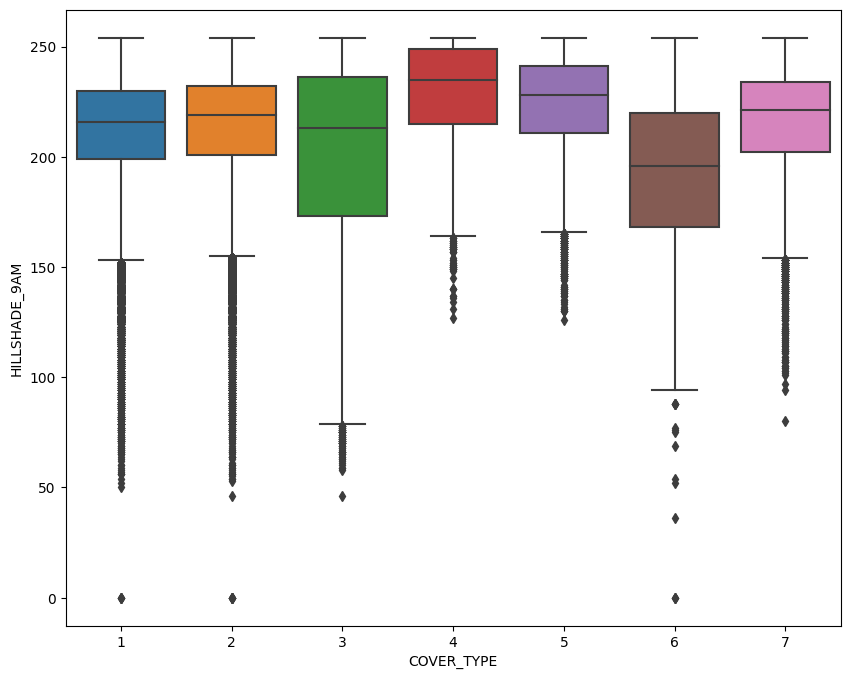

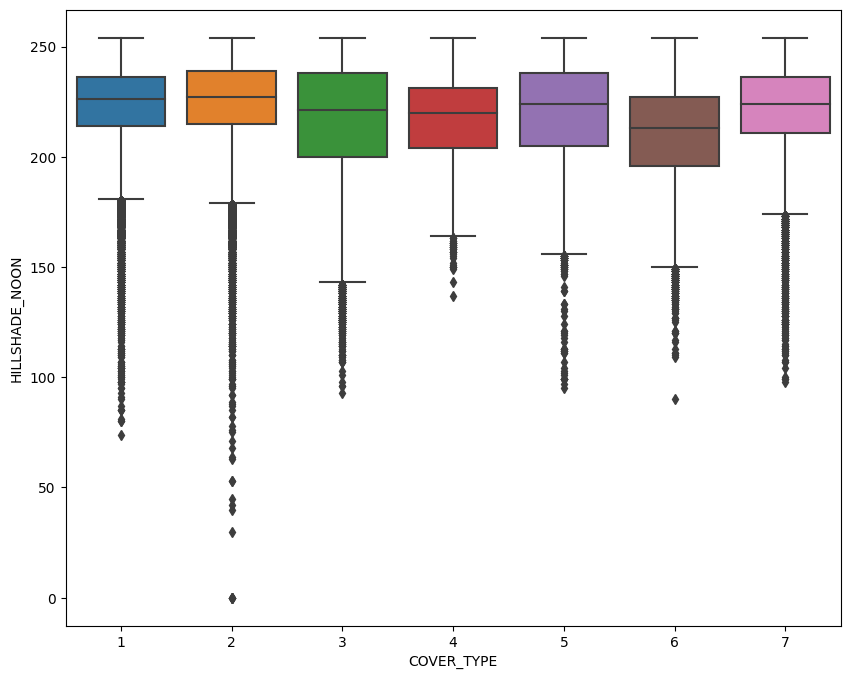

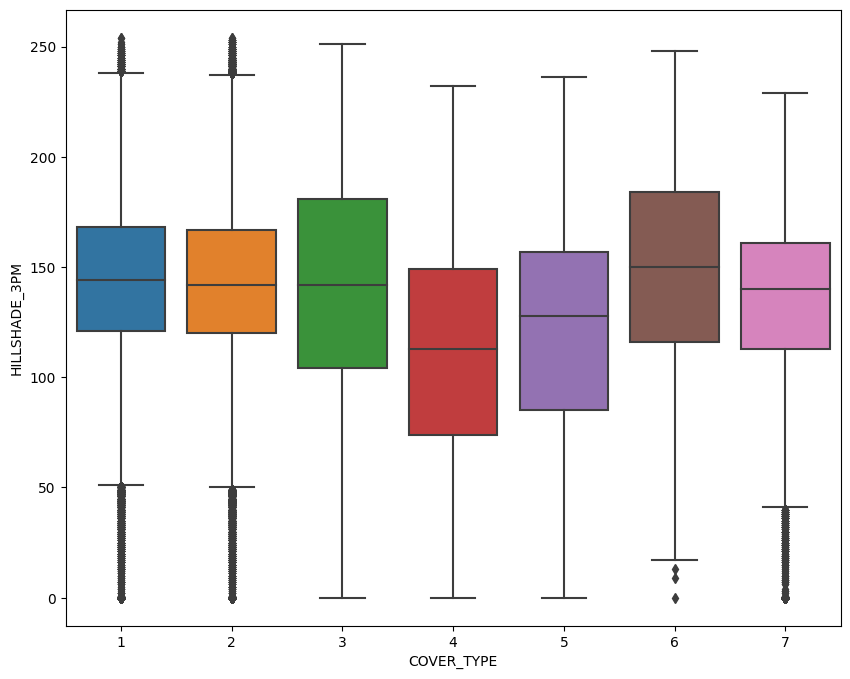

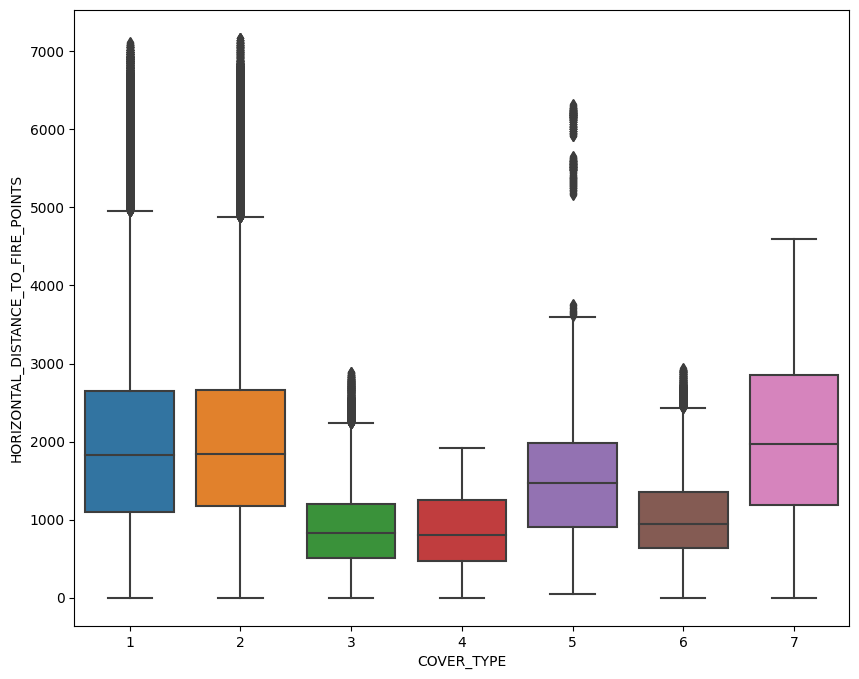

In [12]:
for i in range(10):
    plt.figure()
    sns.boxplot(data=df_cover,x="COVER_TYPE", y=df_cover.columns[i])

- Are there any features which shows little variance with respect to classes? Which ones?

**Answer:**
Both `VERTICAL_DISTANCE_TO_HYDROLOGY` and `HILLSHADE_NOON` show little variance.

- Which features might be particularly useful in the prediction?

**Answer:**
`ELEVATION` shows rather good discriminative properties to predict `COVER_TYPE`

## 4) Training Models

### 4.0) Data Preparation (1 point)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

from sklearn.model_selection import GridSearchCV

- Define Feature (X) and Target (y). Use only the first 10 columns for X

In [14]:
X = df_cover[df_cover.columns[:10]].to_numpy()
y = df_cover["COVER_TYPE"].to_numpy()

- Split the data into train and test with test size and 30% and train size as 70%, use a random seed. And print the shape of the datasets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(406708, 10) (174304, 10) (406708,) (174304,)


- Normalize data using ```StandardScaler()```

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

### 4.A) Logistic Regression (1 point)
- Train the Linear Regression model

In [17]:
logreg = LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

logreg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000, n_jobs=-1, random_state=42)

- Predict on the test data

In [18]:
y_pred = logreg.predict(X_test_scaled)

- Compute and print performance metrics, using ```accuracy_score()```: the fraction of correctly classified samples.

In [19]:
print(f"Fraction of correctly classified samples: {accuracy_score(y_test, y_pred):0.2f}")

Fraction of correctly classified samples: 0.70


### 4.B) Decision Tree Classification (1 point)
- Train and test with decision tree classifier
- Print the accuracy

In [20]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)

y_pred = decision_tree.predict(X_test_scaled)
print(f"Fraction of correctly classified samples: {accuracy_score(y_test, y_pred):0.2f}")

Fraction of correctly classified samples: 0.91


### 4.C) Random Forest (1 point)
- Train and test with decision tree classifier
- Print the accuracy

In [21]:
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)
random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_test_scaled)
print(f"Fraction of correctly classified samples: {accuracy_score(y_test, y_pred):0.2f}")

Fraction of correctly classified samples: 0.95


### 4.D) K Nearest Neighbor (1 point)
- Train and test with KNN classifier
- Print the accuracy

(It might take a bit long, around an hour if using one cpu core. Use n_jobs=-1 to speed it up then it should take only seconds to minutes)

In [22]:
knn = KNeighborsClassifier(n_jobs=-1)
knn.fit(X_train_scaled, y_train)

y_pred = knn.predict(X_test_scaled)
print(f"Fraction of correctly classified samples: {accuracy_score(y_test, y_pred):0.2f}")

Fraction of correctly classified samples: 0.90


### 4.E) Hyperparameter Tuning (2 points)

Let's search a better K (use candidates \[3,5,11\]) for the KNN classifier, using ```GridSearchCV()```.

- Define parameter candidates and grid search

In [23]:
parameters = {
    "n_neighbors": [3, 5, 11],
    # "n_jobs": [-1],
}

- Fit the model with all grid parameters

In [24]:
clf = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=parameters, n_jobs=-1, verbose=10, cv=5)
clf.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': [3, 5, 11]}, verbose=10)

- Print the best K.

In [25]:
print(f"The best K value is {clf.best_params_['n_neighbors']:d}.")

The best K value is 3.


- predict on the test data using the best model from the grid search without retraining it. Calculate the accuracy and print it.

In [26]:
best_knn = clf.best_estimator_
best_knn.fit(X_train_scaled, y_train)

y_pred = best_knn.predict(X_test_scaled)
print(f"Fraction of correctly classified samples: {accuracy_score(y_test, y_pred):0.2f}")

Fraction of correctly classified samples: 0.90


### 4.F) Support Vector Machine (1 point)
- Train and test with SVM classifier
- Print the accuracy

Since it takes up to a few hours to train the SVM. 
Subsample your dataset to 10% of its original size for the training and testing data by using every 10th sample (Only for this step. Use the full dataset for the Following steps)

In [27]:
svc = svm.SVC(kernel="rbf", random_state=42)
svc.fit(X_train_scaled[::10,:], y_train[::10])

y_pred = svc.predict(X_test_scaled)
print(f"Fraction of correctly classified samples: {accuracy_score(y_test, y_pred):0.2f}")

Fraction of correctly classified samples: 0.74


### Conclusion
- Please write your conclusion: _Logistic Regression performs rather poorly compared to the other Classifiers. This hints towards the need of non-linear decision boundaries. Random Forest outperforms its "single tree" counterpart Decision Tree. The KNN Classifier performs best with a low `k` value. This could lead to overfitting though and might be detrimental to generalization to other test sites, unseen in the train data._

Accuracy score:
- Logistic Regression: 0.70
- Decision Tree: 0.91
- Random Forest: 0.95
- K Nearest Neighbor: 0.90
- K Nearest Neighbor after hypertuning K (optional): 0.90
- Support Vector Machine: 0.74

Let's go deeper.
## 5) Data imbalance problem

An imbalanced classification problem is an example of a classification problem where the distribution of examples across the known classes is biased or skewed. The distribution can vary from a slight bias to a severe imbalance where there is one example in the minority class for hundreds, thousands, or millions of examples in the majority class or classes.

Imbalanced classifications pose a challenge for predictive modeling as most of the machine learning algorithms used for classification were designed around the assumption of an equal number of examples for each class. This results in models that have poor predictive performance, specifically for the minority class. This is a problem because typically, the minority class is more important and therefore the problem is more sensitive to classification errors for the minority class than the majority class.

Here you can change the dataset that you use to build your predictive model to have more balanced data.

This change is called sampling your dataset and there are two main methods that you can use to even-up the classes:

- 1) You can add copies of instances from the under-represented class called over-sampling (or more formally sampling with replacement); 
- 2) or you can delete instances from the over-represented class, called under-sampling.

Please train Randome Forest classifiers with both under-sampled data and over-sampled data, and compare their accuracy scores.

As we have seen in 3), the data is imbalanced.

### 5.A) Training with under-sampled data (3 point)

- Print the size of the smallest class

In [28]:
print(counts.min())

2747


- Undersample all the majority classes so that all classes have the same smallest cardinality.

In [29]:
df_cover_undersampled = df_cover.groupby("COVER_TYPE").sample(n=counts.min(), random_state=42)

- Check the class distribution of the undersampled data

In [30]:
print(df_cover_undersampled["COVER_TYPE"].value_counts(sort=True))

1    2747
2    2747
3    2747
4    2747
5    2747
6    2747
7    2747
Name: COVER_TYPE, dtype: int64


- Preprocessing data (define X, y; train test split; normalize data)

In [31]:
X = df_cover_undersampled[df_cover.columns[:10]].to_numpy()
y = df_cover_undersampled["COVER_TYPE"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


(13460, 10) (5769, 10) (13460,) (5769,)


- Train and test random forest classifier on under-sampled data
- Print the accuracy

In [32]:
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)
random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_test_scaled)
print(f"Fraction of correctly classified samples: {accuracy_score(y_test, y_pred):0.2f}")

Fraction of correctly classified samples: 0.83


### 5.B) Training with over-sampled data (3 point)

- Print the size of the largest class

In [33]:
print(counts.max())

283301


- Oversample the classes.

In [34]:
df_cover_oversampled = df_cover.groupby("COVER_TYPE").sample(n=counts.max(), replace=True, random_state=42)

- Check the class distribution of the oversampled data

In [35]:
print(df_cover_oversampled["COVER_TYPE"].value_counts(sort=True))

1    283301
2    283301
3    283301
4    283301
5    283301
6    283301
7    283301
Name: COVER_TYPE, dtype: int64


- Preprocessing data (define X, y; train test split; normalize data)

In [36]:
X = df_cover_oversampled[df_cover.columns[:10]].to_numpy()
y = df_cover_oversampled["COVER_TYPE"].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

(1388174, 10) (594933, 10) (1388174,) (594933,)


- Train and test random forest classifier on over-sampled data
- Print the accuracy

In [37]:
random_forest = RandomForestClassifier(n_jobs=-1, random_state=42)
random_forest.fit(X_train_scaled, y_train)

y_pred = random_forest.predict(X_test_scaled)
print(f"Fraction of correctly classified samples: {accuracy_score(y_test, y_pred):0.2f}")

Fraction of correctly classified samples: 0.99


#### Conclusion on imbalanced data solution (with random forest classifier):
For the undersampled approach, the size reduction of the training data by a factor of 30 negatively impacts the accuracy of the prediction on the test data. For the oversampled data, the resampling to increase the data of underrepresented classes leads to a high likelihood of test data being already seen during training, which can explain the almost perfect prediction score. To make this approach more robust, one could apply more elaborate data augmentation strategies, such as adding noise to copied data. Another approach would be to oversample the data after the train/test split.

Accuracy:

- Imbalanced data: 0.95
- Undersampled data: 0.83
- Oversampled data: 0.99

This form of over-sampling amounts to cheating however: Some of the data are copied both in train and test set.

Is this a question? The problem could be mitigated by splitting the dataframe into train test dataframes and then oversampling.